### Code to plot a telemetry profile - Running this notebook with plot the most recent saved data that you generated
#### 2021 0128 CJH
#### See telemetry_plot.ipynb for more information
---
* Imports a file with helper function definitions `import telemetry_plot_utils as tpu ` 
* Reads data from the robot/sim/data folder with `telemetry = tpu.load_file(file)`
* Converts that data to a useful pandas dataframe with `df = tpu.fix_data(telemetry)`
  * `df, telemetry = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)` combines the load and table functions
* Gets a list of the pathweaver points with `df_points = tpu.get_points_df(name='bounce')`
* Plots them all together with plot_df, e.g. `tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)`
* Plots the velocity profiles with e.g. `tpu.velocity_plot(df_slalom_weave)`

In [43]:
#from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from importlib import reload

In [44]:
import telemetry_plot_utils as tpu 

### loading point lists from pathweaver files - use this explicitly if the 'guess' option fails
* just pass the function the unique part of the name of the file you want the points for and this gets plotted on the summary

In [45]:
path_weaver_files = data_files = glob.glob('../robot/pathweaver/paths/*')
print(path_weaver_files)

['../robot/pathweaver/paths\\barrel_pw0', '../robot/pathweaver/paths\\barrel_pw1', '../robot/pathweaver/paths\\barrel_test', '../robot/pathweaver/paths\\bounce_pw0', '../robot/pathweaver/paths\\bounce_pw1', '../robot/pathweaver/paths\\bounce_pw2', '../robot/pathweaver/paths\\bounce_pw3', '../robot/pathweaver/paths\\bounce_pw4', '../robot/pathweaver/paths\\calibrate', '../robot/pathweaver/paths\\calibrate_rev', '../robot/pathweaver/paths\\slalom_cjh_fast', '../robot/pathweaver/paths\\slalom_cjh_slow', '../robot/pathweaver/paths\\slalom_pw0']


In [46]:
df_points = tpu.get_points_df(name='slalom_cjh_slow')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,0.686751,0.520091,0.006372,True,False,NaN
1,2.098016,0.928900,0.210287,0.312245,True,False,NaN
2,2.646037,1.833772,0.385870,0.478197,False,False,NaN
3,3.206803,2.400910,0.312245,0.223032,True,False,NaN
4,3.773941,2.732271,0.560766,0.159308,True,False,NaN


#### trick to get all four bounce paths in one point list

In [52]:
bounces = ['bounce_pw'+str(i+1) for i in range(4)]
dfs = []
for bounce_file in bounces:
    dfs.append(tpu.get_points_df(name=bounce_file))
df_bounce_points = pd.concat(dfs)
df_bounce_points

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,2.330814,2.827908,-0.073369,True,False,NaN
1,2.346537,3.363132,0.000103,0.049548,True,False,NaN
0,2.306409,3.456494,0.048879,1.368055,True,True,NaN
1,2.932792,1.304868,-0.140347,0.276459,True,True,NaN
2,4.411174,1.164676,-0.796542,-1.064180,True,True,NaN
3,4.559560,3.423839,0.012745,-0.100000,True,True,NaN
0,4.615089,3.477834,0.204090,-2.498059,True,False,NaN
1,5.114684,1.031907,1.126576,-0.326544,True,False,NaN
2,6.306569,1.015580,0.595942,0.391852,True,False,NaN
3,6.839035,3.356760,-0.024491,0.244908,True,False,NaN


---
#### Plot the most recent trajectory - you have to run the ramsete command and select "write_data" to be true in the dashboard to save data
* To plot something else, change the filename in tpu.getdata().  It defaults to finding the most recent file in robot/sim/data.
* Now it is guessing which set of points you need if you set `guess_points=True`.  Set to false and it will use the point_df you specify
* Don't use guess on bounce yet

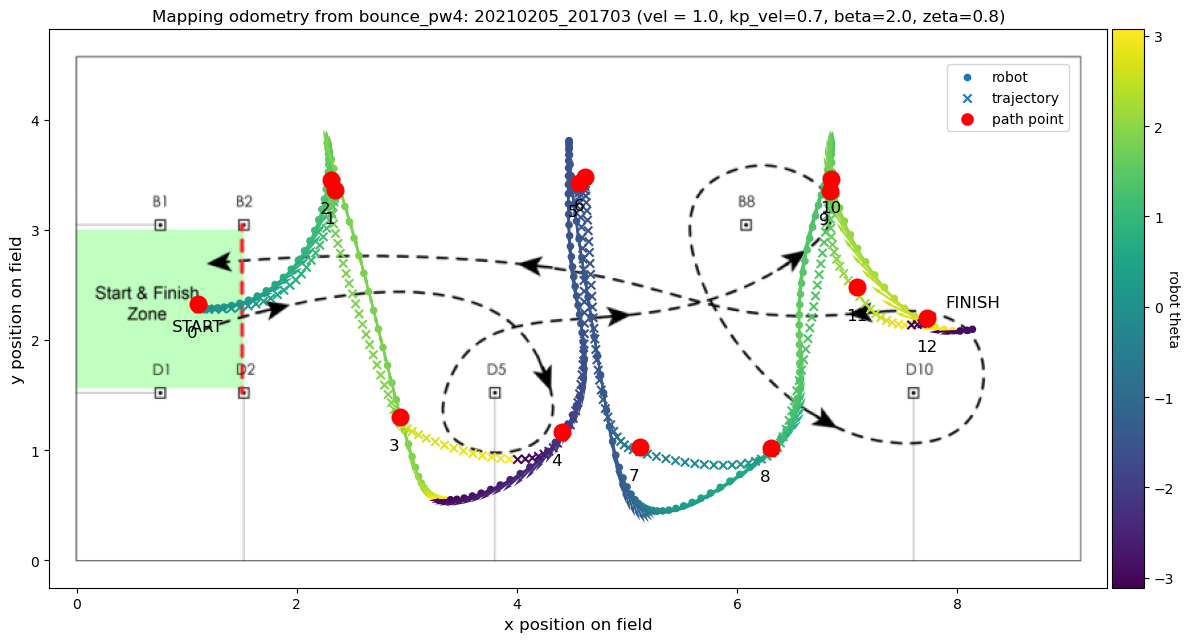

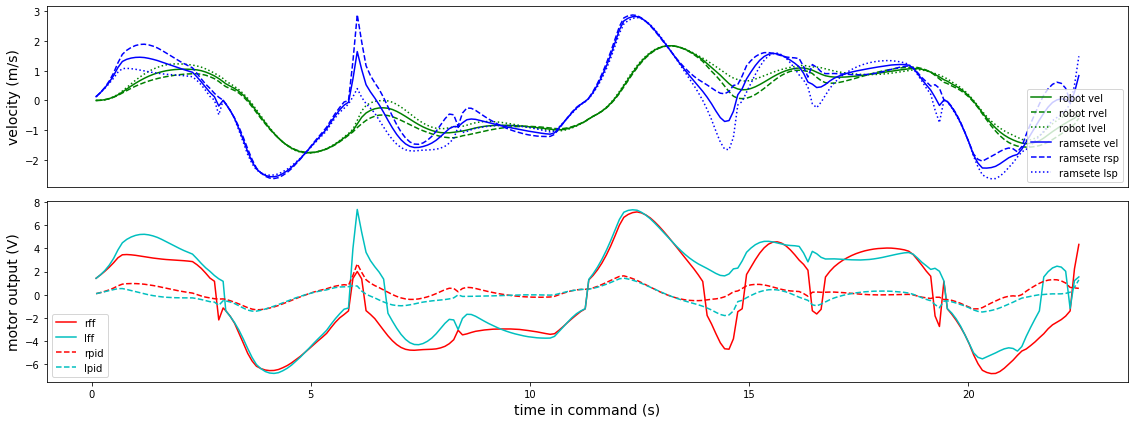

In [53]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=None, x_offset=0, y_offset=0.0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=df_bounce_points, background='barrel', arrows=True, save=False)
tpu.velocity_plot(df_data)